In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import folium
from geopy.geocoders import Nominatim
import re



In [ ]:
dataSetPath = r"c:\Users\Lenovo\Desktop\University\Year 4\Machine\Electric_Vehicle_Population_Data.csv"

# Read the CSV file
data = pd.read_csv(dataSetPath)


In [ ]:
print(data.columns.tolist())

['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract']


Missing values count and percentage by column:
                      Missing Count  Missing Percentage
County                            4            0.001903
City                              4            0.001903
Postal Code                       4            0.001903
Electric Range                    5            0.002379
Base MSRP                         5            0.002379
Legislative District            445            0.211738
Vehicle Location                 10            0.004758
Electric Utility                  4            0.001903
2020 Census Tract                 4            0.001903


C:\Users\reest\AppData\Local\Temp\ipykernel_7460\1438478882.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index, y=missing_data['Missing Count'], palette="viridis")


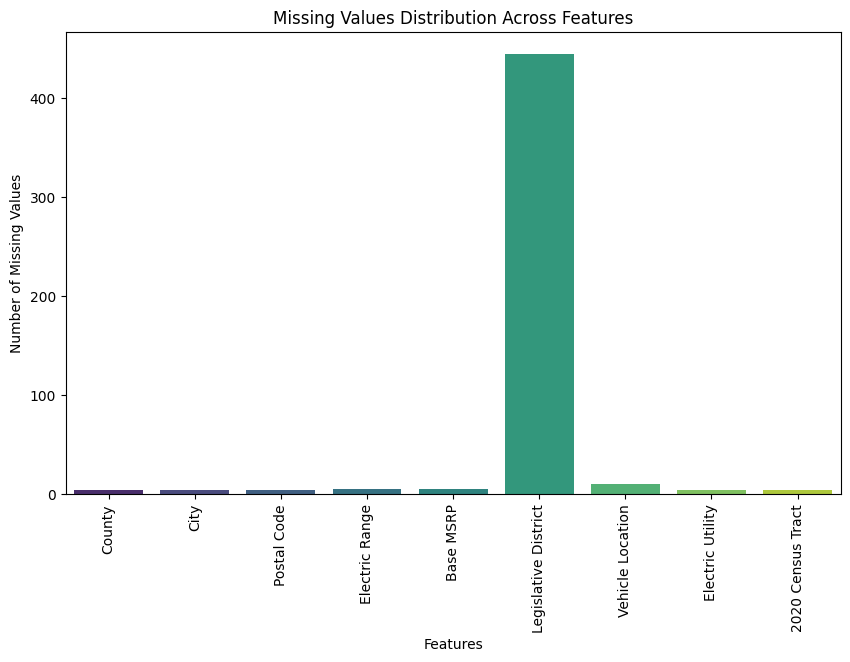

In [ ]:
missingVals = data.isnull().sum()
missingVals = missingVals[missingVals > 0] 

percentage = (missingVals / len(data)) * 100

missingData = pd.DataFrame({
    'Missing Count': missingVals,
    'Missing Percentage': percentage
})

print("Missing values per column (count and percentage)")
print(missingData)

plt.figure(figsize=(10, 6))
sns.barplot(x=missingData.index, y=missingData['Missing Count'], palette="viridis")
plt.xticks(rotation=90)
plt.title("Missing Values Distribution Across Features")
plt.xlabel("Features")
plt.ylabel("Number of Missing Values")
plt.show()


In [ ]:
# Don't modify original dataset (might re-use later)
cleanedData = data.copy()

for col in cleanedData.select_dtypes(include=[np.number]).columns:
    cleanedData[col].fillna(cleanedData[col].median(), inplace=True) # fill numerical with the median

for col in cleanedData.select_dtypes(exclude=[np.number]).columns:
    mode_value = cleanedData[col].mode()[0] if not cleanedData[col].mode().empty else 'Unknown'
    cleanedData[col].fillna(mode_value, inplace=True) # Fill categoral with Mode

print("\nMissing values after cleaning:\n", cleanedData.isnull().sum())



Missing values after imputation:
 VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

First few rows o

Missing values count by column:
Series([], dtype: int64)


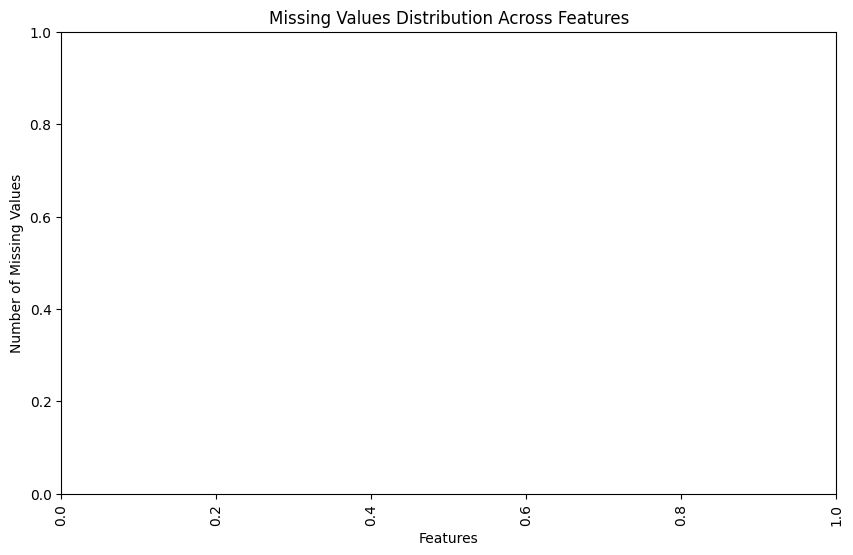

In [ ]:
#Re-do plotting of missing values to verify last step
missingVals = cleanedData.isnull().sum()
missingVals = missingVals[missingVals > 0] 

print("Missing values:")
print(missingVals)

plt.figure(figsize=(10, 6))
sns.barplot(x=missingVals.index, y=missingVals.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Missing Values Distribution Across Features")
plt.xlabel("Features")
plt.ylabel("Number of Missing Values")
plt.show()

In [ ]:
# Identify numerical and categoral columns (print)
numerics = data.select_dtypes(include=[np.number]).columns.tolist()

# Identify categorical (non-numeric) columns
categoricals = data.select_dtypes(exclude=[np.number]).columns.tolist()

# Print the column names
print("Numerical Columns:")
print(numerics)

print("\nCategorical Columns:")
print(categoricals)

Numerical Columns:
['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']

Categorical Columns:
['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']


Encode Dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def normalize_column_inplace(data, column):
    print(column)
    scaler = MinMaxScaler()
    # In-place normalization
    data[column] = scaler.fit_transform(data[[column]])

In [ ]:
# Encoding
label_encoder = LabelEncoder()
cleanedData['VIN (1-10)'] = label_encoder.fit_transform(cleanedData['VIN (1-10)']) # Label encode first column (It's all unique values)

for column in cleanedData.select_dtypes(include=['number']).columns.tolist():
    normalize_column_inplace(cleanedData, column) # inplace normalization for numerical features

categoricals = cleanedData.select_dtypes(exclude=[np.number]).columns.tolist()

# One-hot encode rest of categoral feats
EncodedData = pd.get_dummies(cleanedData, columns=categoricals, drop_first=False)

print(len(EncodedData.columns.tolist()))
print(EncodedData.columns.tolist())

VIN (1-10)
Postal Code
Model Year
Electric Range
Base MSRP
Legislative District
DOL Vehicle ID
2020 Census Tract
2222
['VIN (1-10)', 'Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract', 'County_Ada', 'County_Adams', 'County_Alameda', 'County_Albemarle', 'County_Alexandria', 'County_Allen', 'County_Anchorage', 'County_Anne Arundel', 'County_Arapahoe', 'County_Arlington', 'County_Asotin', 'County_Atlantic', 'County_Autauga', 'County_Bay', 'County_Beaufort', 'County_Bell', 'County_Benton', 'County_Berkeley', 'County_Bexar', 'County_Brevard', 'County_Brown', 'County_Burlington', 'County_Caddo', 'County_Calvert', 'County_Carroll', 'County_Charles', 'County_Charleston', 'County_Chelan', 'County_Chesapeake', 'County_Chesterfield', 'County_Christian', 'County_Churchill', 'County_Clallam', 'County_Clark', 'County_Collin', 'County_Columbia', 'County_Contra Costa', 'County_Cook', 'County_Cowlitz', 'County_Cumberland', 'County_C

In [ ]:
numericColumns = cleanedData.select_dtypes(include=['number'])

statistics = numericColumns.describe().loc[['mean', '50%', 'std']]

statistics.rename(index={'50%': 'median'}, inplace=True)

print(statistics)


        VIN (1-10)  Postal Code  Model Year  Electric Range  Base MSRP  \
mean      0.390041     0.985704    0.848025        0.150151   0.001062   
median    0.398836     0.985160    0.884615        0.000000   0.000000   
std       0.222079     0.024992    0.114959        0.258079   0.009057   

        Legislative District  DOL Vehicle ID  2020 Census Tract  
mean                0.582009        0.477982           0.944716  
median              0.645833        0.501850           0.945693  
std                 0.310276        0.148472           0.028198  


C:\Users\reest\AppData\Local\Temp\ipykernel_7460\265137731.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')


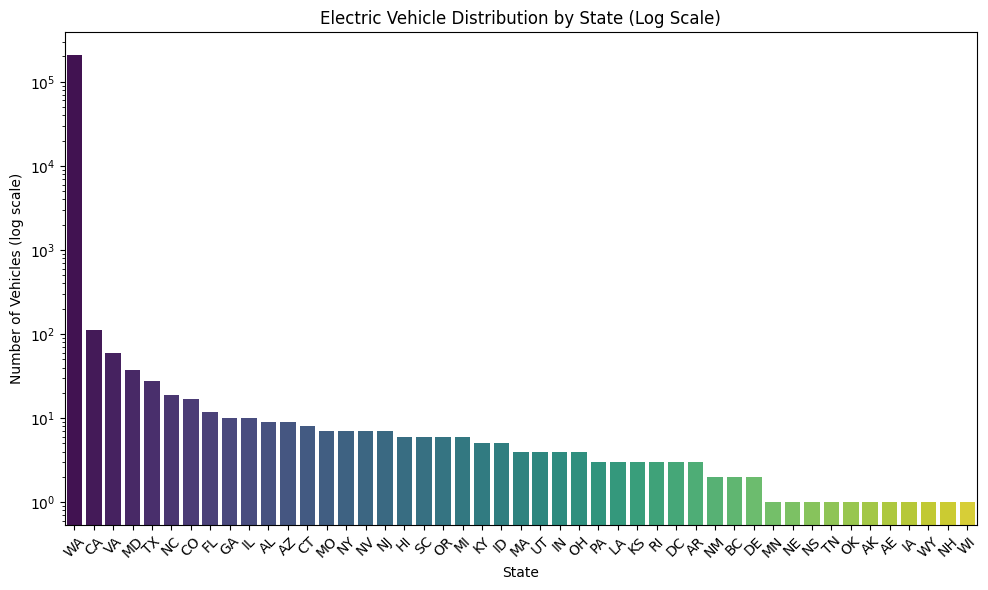

In [ ]:

state_counts = cleanedData['State'].value_counts()


plt.figure(figsize=(10, 6))  
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')

# Apply log scale to the y-axis
plt.yscale('log')

plt.xlabel('State')
plt.ylabel('Number of Vehicles (log scale)')
plt.title('Electric Vehicle Distribution by State (Log Scale)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\reest\AppData\Local\Temp\ipykernel_7460\1445007228.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette='coolwarm')


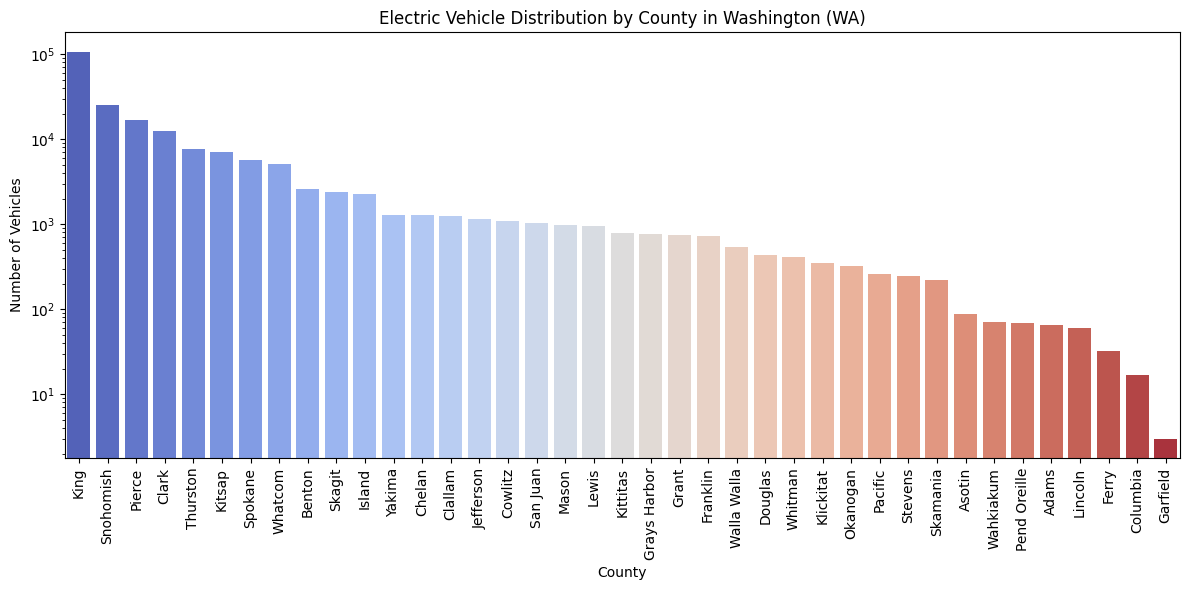

In [ ]:

wa_data = cleanedData[cleanedData['State'] == 'WA']

city_counts = wa_data['County'].value_counts()

plt.figure(figsize=(12, 6)) 
sns.barplot(x=city_counts.index, y=city_counts.values, palette='coolwarm')

plt.yscale('log')
plt.xlabel('County')
plt.ylabel('Number of Vehicles')
plt.title('Electric Vehicle Distribution by County in Washington (WA)')
plt.xticks(rotation=90)  

plt.tight_layout()
plt.show()


C:\Users\reest\AppData\Local\Temp\ipykernel_7460\1261142734.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_counts.values, y=model_counts.index, palette='viridis')


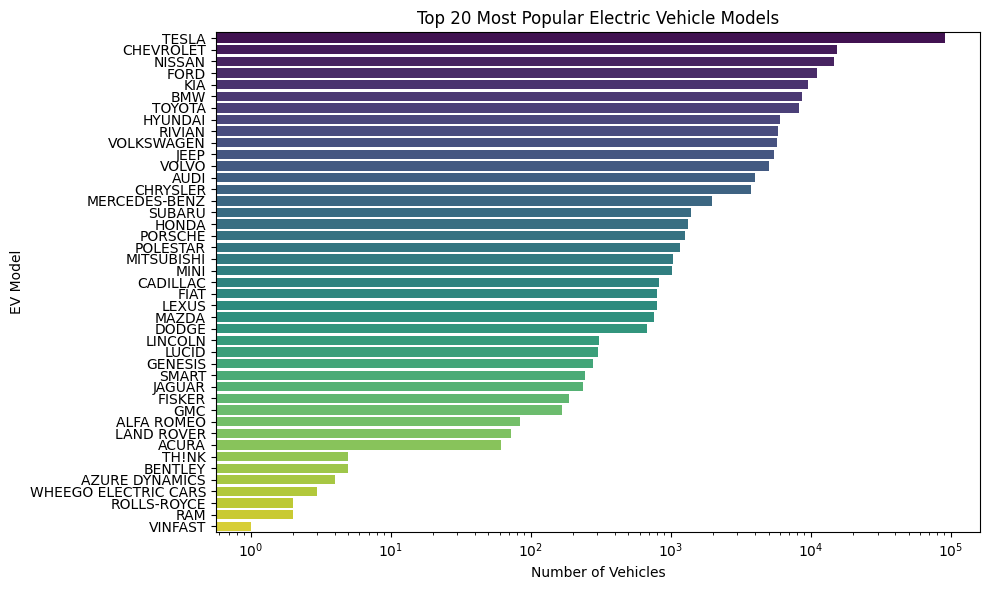

In [ ]:

model_counts = cleanedData['Make'].value_counts()

plt.figure(figsize=(10, 6)) 
top_10_models = model_counts.head(20)
sns.barplot(x=model_counts.values, y=model_counts.index, palette='viridis')

plt.xscale('log')
plt.xlabel('Number of Vehicles')
plt.ylabel('EV Model')
plt.title('Top 20 Most Popular Electric Vehicle Models')
plt.tight_layout()
plt.show()


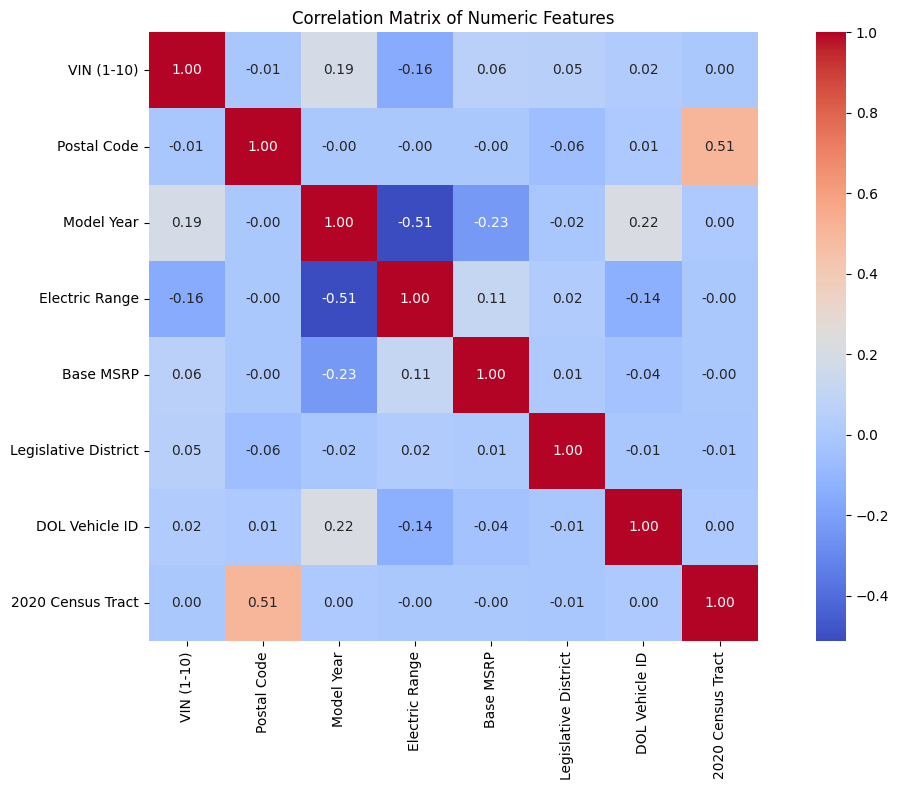

In [ ]:

correlationMatrix = cleanedData.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlationMatrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()

# Show the plot
plt.show()


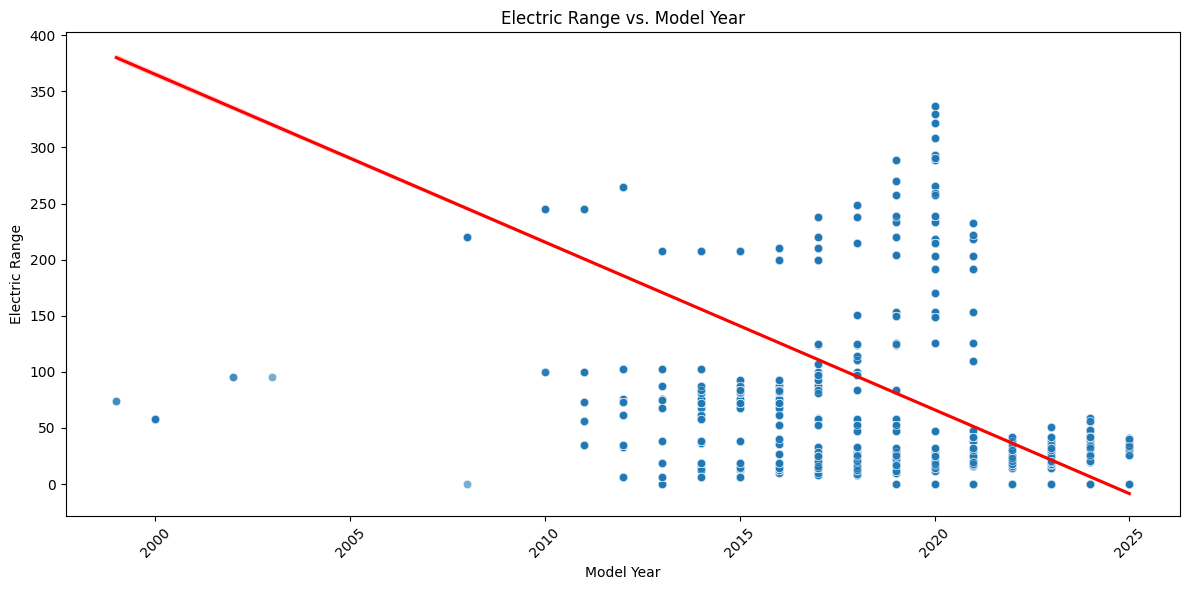

In [ ]:
model_year = data['Model Year']
electric_range = data['Electric Range']

plt.figure(figsize=(12, 6)) 
sns.scatterplot(x=model_year, y=electric_range, alpha=0.6)

sns.regplot(x=model_year, y=electric_range, scatter=False, color='red')

plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.title('Electric Range vs. Model Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


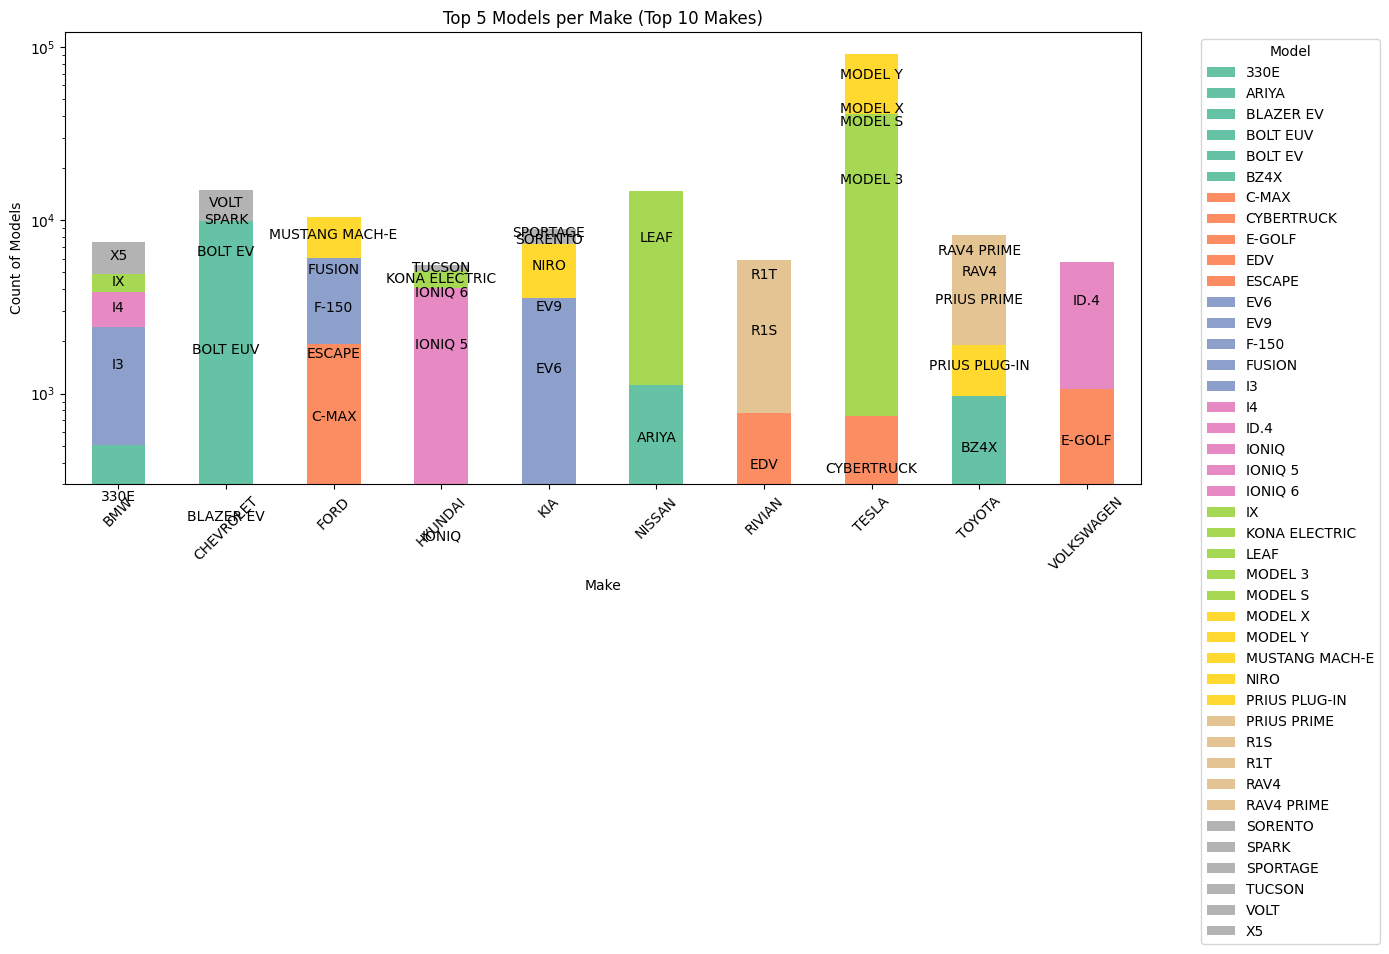

In [ ]:
make_model_counts = cleanedData.groupby(['Make', 'Model']).size().reset_index(name='Count')
top_makes = make_model_counts.groupby('Make')['Count'].sum().nlargest(10).index
filtered_data = make_model_counts[make_model_counts['Make'].isin(top_makes)]
top_models_per_make = filtered_data.groupby('Make').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

pivot_data = top_models_per_make.pivot(index='Make', columns='Model', values='Count').fillna(0)

plt.figure(figsize=(14, 8))
ax = pivot_data.plot(kind='bar', stacked=True, colormap='Set2', ax=plt.gca())
plt.yscale('log')
plt.xlabel('Make')
plt.ylabel('Count of Models')
plt.title('Top 5 Models per Make (Top 10 Makes)')
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

for i in range(len(pivot_data)):
    cumulative_count = 0
    for model in pivot_data.columns:
        if pivot_data[model].iloc[i] > 0:
            height = pivot_data[model].iloc[i]
            plt.text(i, cumulative_count + height / 2, model, ha='center', va='center', color='black', fontsize=10)
            cumulative_count += height

plt.tight_layout()
plt.show()



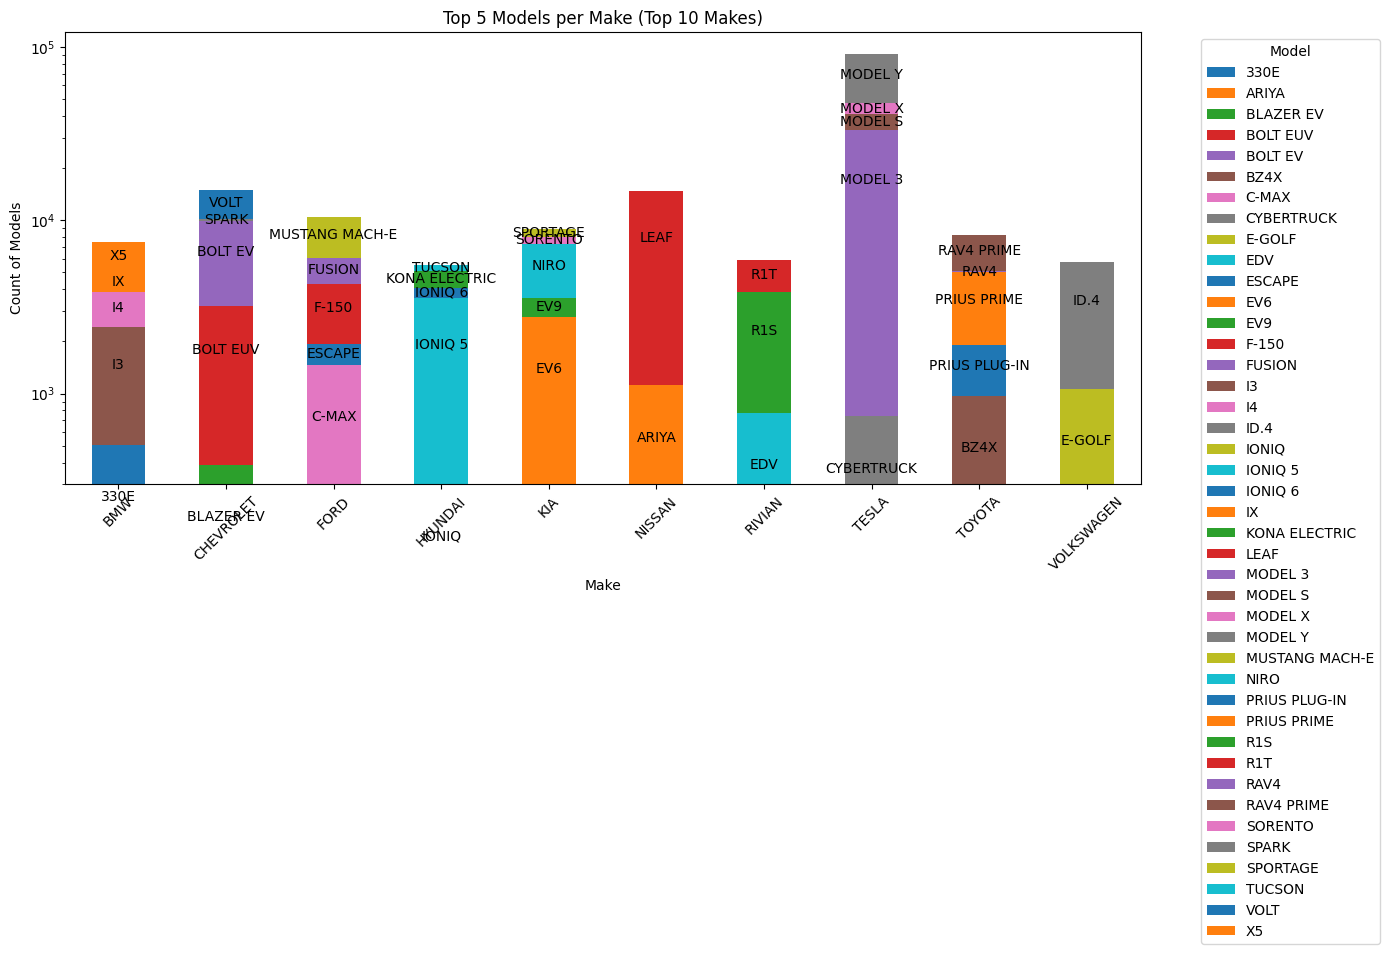

In [ ]:
make_model_counts = cleanedData.groupby(['Make', 'Model']).size().reset_index(name='Count')
top_makes = make_model_counts.groupby('Make')['Count'].sum().nlargest(10).index
filtered_data = make_model_counts[make_model_counts['Make'].isin(top_makes)]
top_models_per_make = filtered_data.groupby('Make').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

pivot_data = top_models_per_make.pivot(index='Make', columns='Model', values='Count').fillna(0)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
model_color_map = {model: colors[i % len(colors)] for i, model in enumerate(pivot_data.columns)}

plt.figure(figsize=(14, 8))
ax = pivot_data.plot(kind='bar', stacked=True, color=[model_color_map[model] for model in pivot_data.columns], ax=plt.gca())


plt.yscale('log')
plt.xlabel('Make')
plt.ylabel('Count of Models')
plt.title('Top 5 Models per Make (Top 10 Makes)')
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left') 


for i in range(len(pivot_data)):
    cumulative_count = 0  
    for model in pivot_data.columns:
        if pivot_data[model].iloc[i] > 0:
            height = pivot_data[model].iloc[i]
            plt.text(i, cumulative_count + height / 2, model, ha='center', va='center', color='black', fontsize=10)
            cumulative_count += height

plt.tight_layout()
plt.show()


C:\Users\reest\AppData\Local\Temp\ipykernel_7460\2658424012.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_states_data, x='State', y='Model Year', palette="viridis")


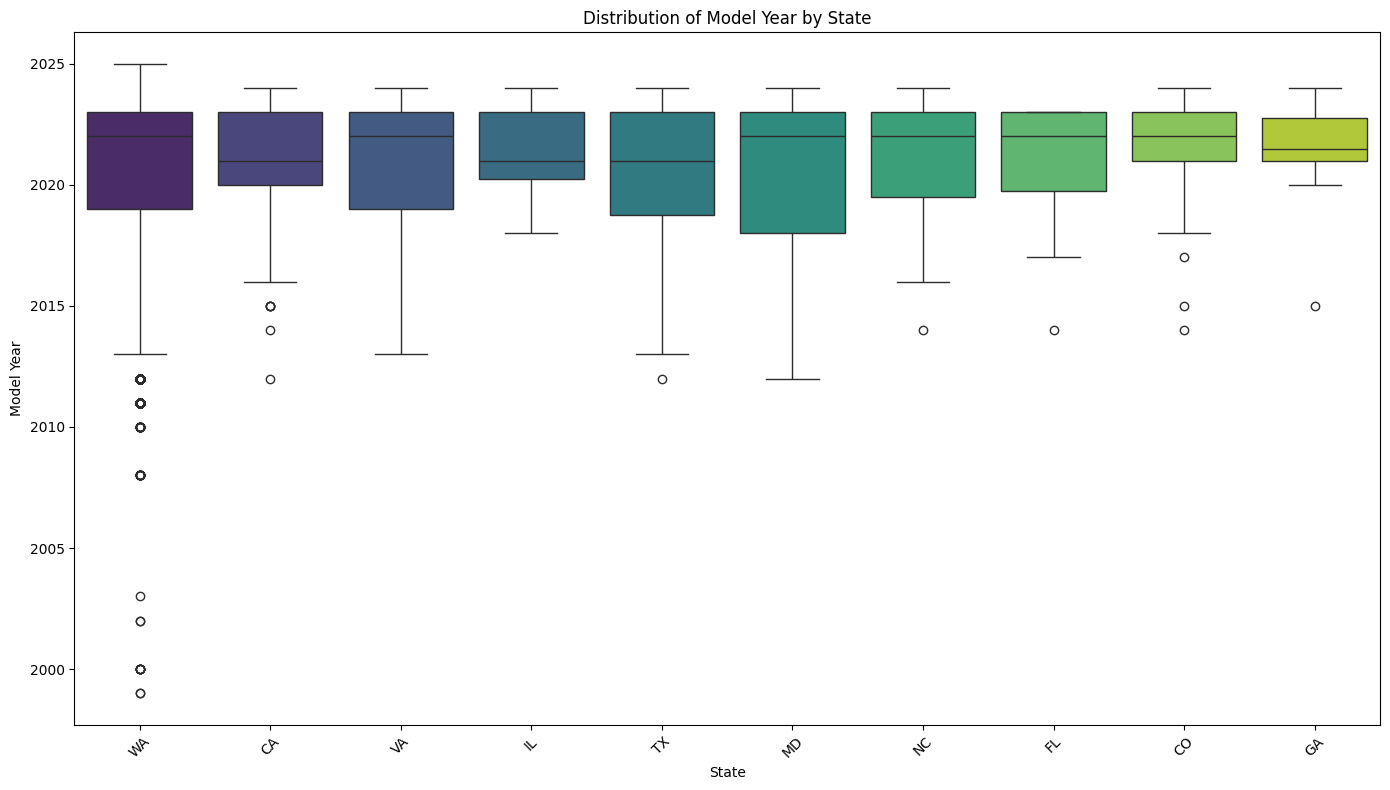

In [ ]:
top_states = data['State'].value_counts().nlargest(10).index

top_states_data = data[data['State'].isin(top_states)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=top_states_data, x='State', y='Model Year', palette="viridis")
plt.xlabel('State')
plt.ylabel('Model Year')
plt.title('Distribution of Model Year by State')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


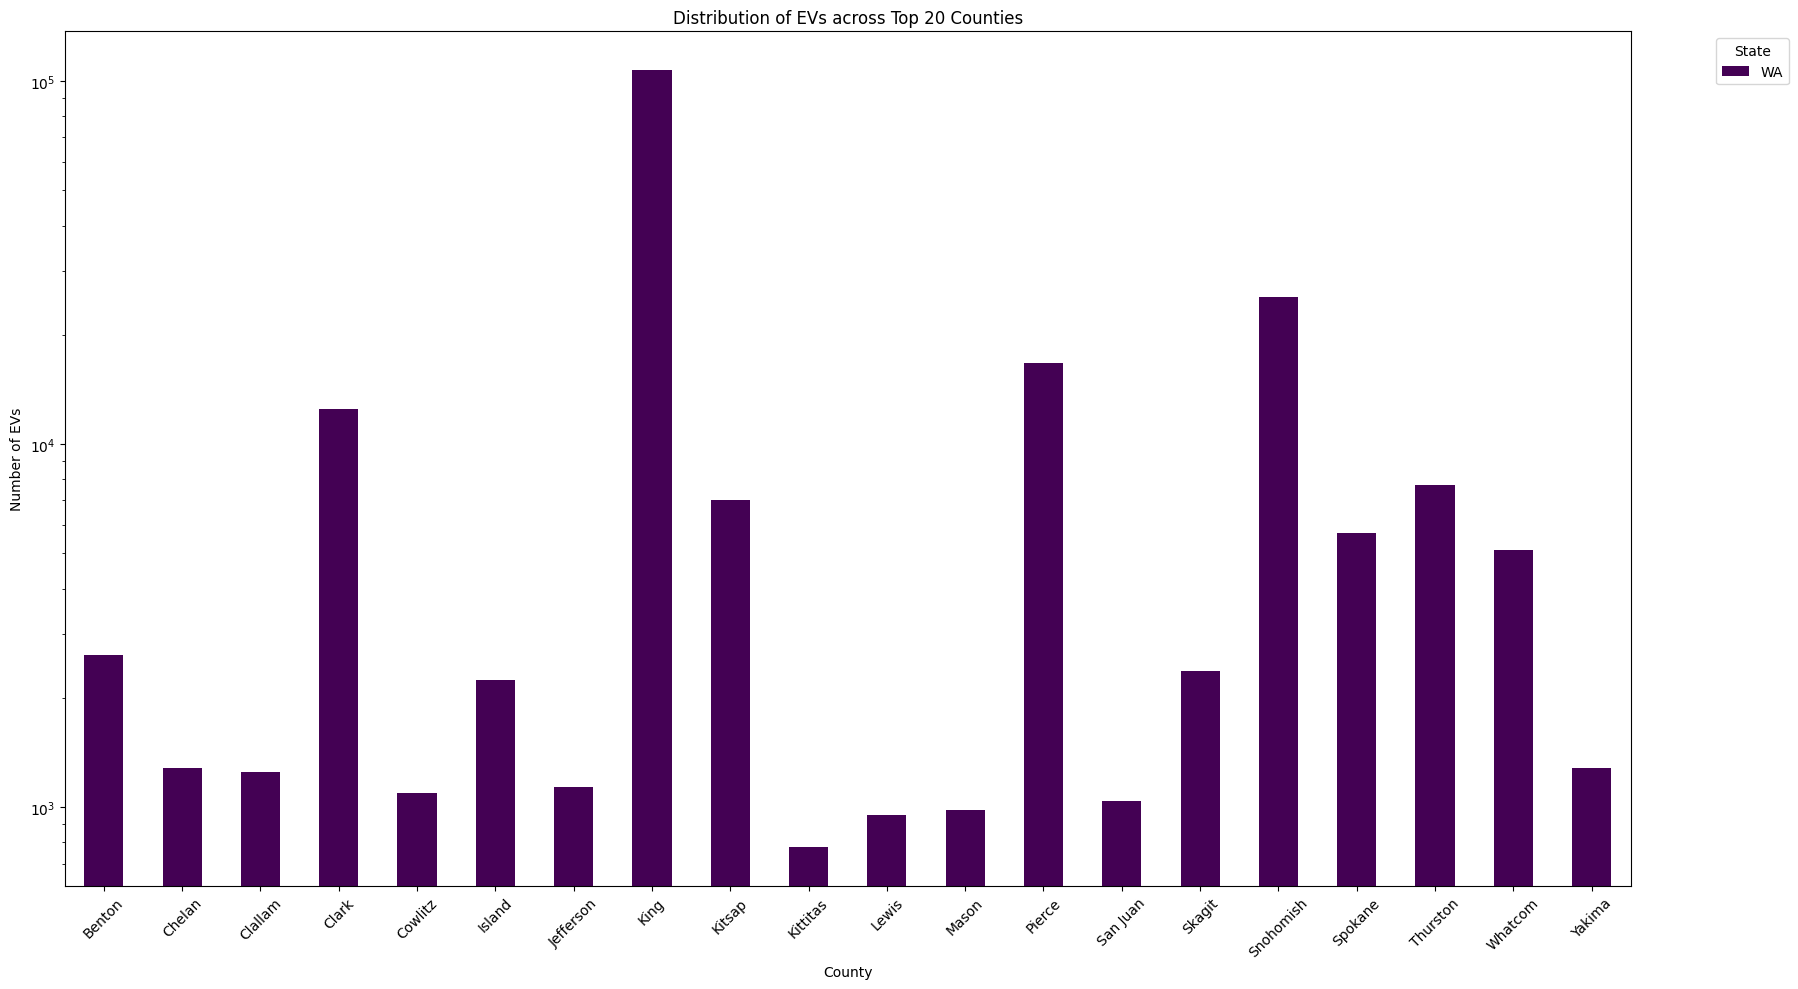

In [ ]:
county_counts = data.groupby(['County', 'State']).size().reset_index(name='EV_Count')
top_counties = county_counts.nlargest(20, 'EV_Count')
pivot_counties = top_counties.pivot(index='County', columns='State', values='EV_Count').fillna(0)

pivot_counties.plot(kind='bar', stacked=True, figsize=(18, 10), colormap="viridis")

plt.yscale('log')
plt.xlabel('County')
plt.ylabel('Number of EVs')
plt.title('Distribution of EVs across Top 20 Counties')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
data['Vehicle Location'] = data['Vehicle Location'].astype(str)

def extract_coordinates(point):
    match = re.match(r'POINT \(([-\d.]+) ([-\d.]+)\)', point)
    if match:
        lon, lat = match.groups()
        return float(lat), float(lon)
    return None, None

data[['Latitude', 'Longitude']] = data['Vehicle Location'].apply(
    lambda x: pd.Series(extract_coordinates(x))
)

map_wa = folium.Map(location=[47.7511, -120.7401], zoom_start=6)

for _, row in data.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=3,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(map_wa)

map_wa.save('EV_Spatial_Distribution_Map_Coordinates.html')


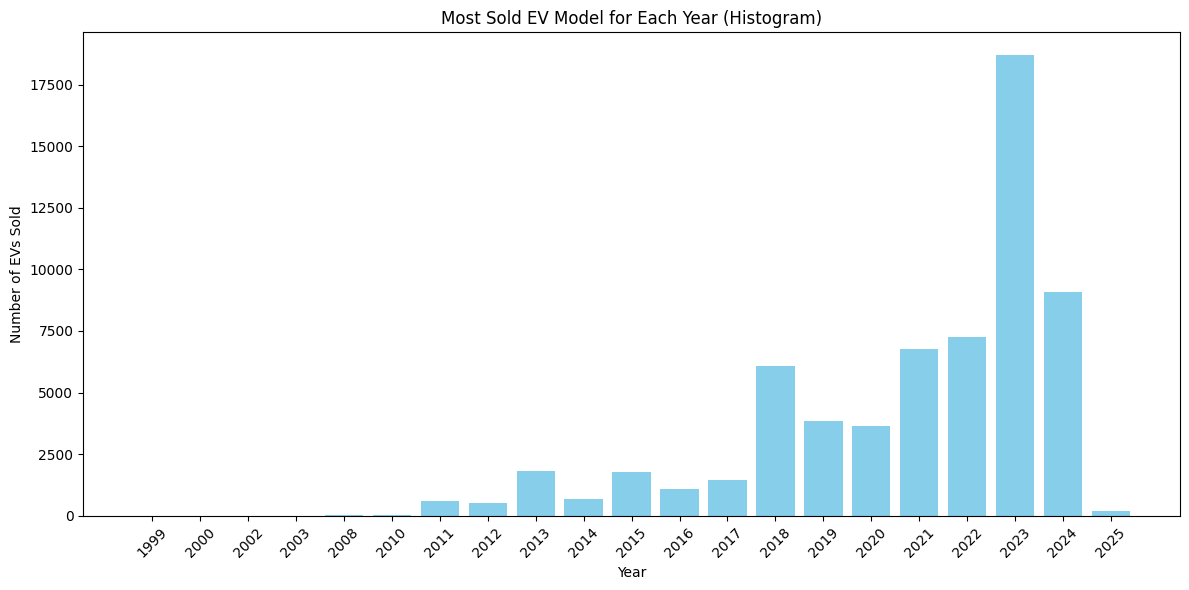

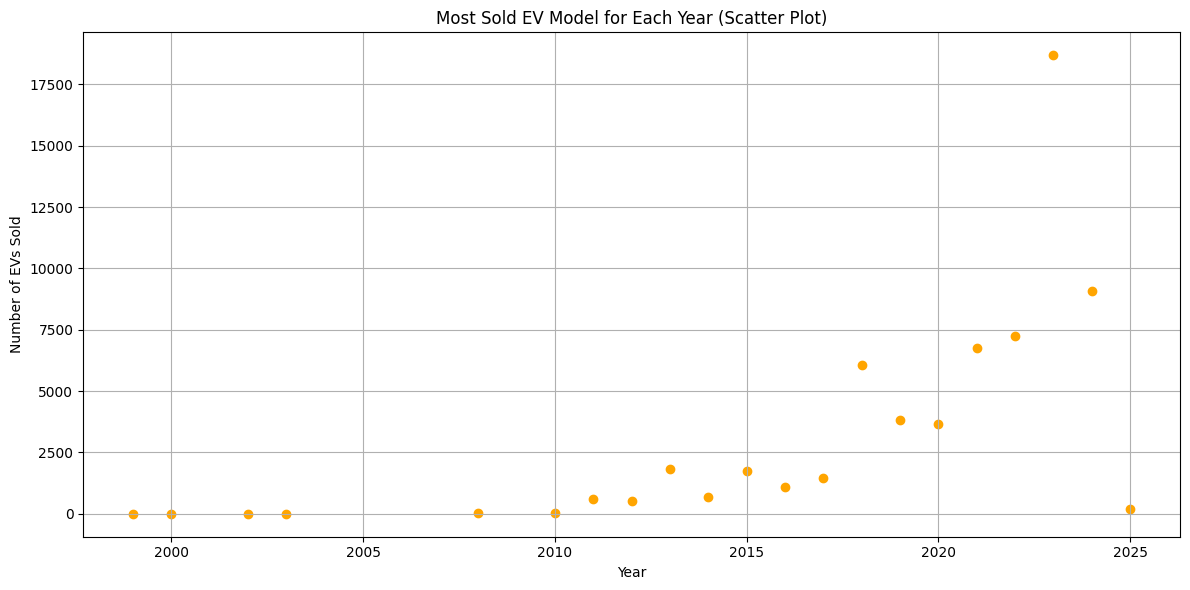

In [ ]:


model_popularity = data.groupby(['Model Year', 'Model']).size().reset_index(name='Count')

most_popular_models = model_popularity.loc[model_popularity.groupby('Model Year')['Count'].idxmax()]

plt.figure(figsize=(12, 6))
plt.bar(most_popular_models['Model Year'].astype(str), most_popular_models['Count'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of EVs Sold')
plt.title('Most Sold EV Model for Each Year (Histogram)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
plt.scatter(most_popular_models['Model Year'], most_popular_models['Count'], color='orange')
plt.xlabel('Year')
plt.ylabel('Number of EVs Sold')
plt.title('Most Sold EV Model for Each Year (Scatter Plot)')
plt.grid(True)
plt.tight_layout()
plt.show()
